# Lab 2: Histograms, law of large numbers, simulating simple games

Please begin by running the code in the following cell to import the packages that are used in this notebook.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scipy.stats as st
import math
print "Modules Imported!"

Modules Imported!


## Plotting a Histogram:

A histogram is a graphical representation of a distribution. It shows the frequency at which values occur. Suppose a probability class has 400 students in it. We can simulate random tests scores (with an average of 70) and plot a histogram. The np.random.rand() function returns a number between 0 and 1. It is from a continuous uniform distribution on this interval. It means that for any $c$ between 0 and 1, the probability the sample number is less than or equal to $c$ is equal to $c.$

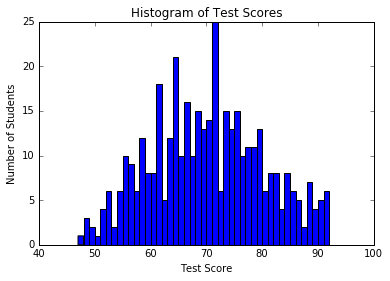

In [3]:
x = np.zeros(400) #Generates an initial array with 400 students
for i in range(400): #Loops through each of the students
    x[i] = (int)(25*(np.random.rand()-np.random.rand())+70) #Generates a random test score for that student
plt.hist(x,bins=np.max(x)-np.min(x)) #Plots a Histogram in range of all valid test scores
plt.title("Histogram of Test Scores")
plt.xlabel('Test Score')
plt.ylabel('Number of Students')

For simulation purposes, it is useful to be able to get a value after a single trial of an RV based on a certain distribution. These are called random variates. From the stats module we've used, you simply need to call the rvs function with a size as an input. NumPy also has an easy way to do this through the random module. When you run the code below, you should see two histograms from the same normal distributions. 

In [120]:
p = (1./3,1./3,1./3) #probabilities of each door (as a tuple)
c = (1,2,3) #Door number (as a tuple)
X = st.rv_discrete(values=(c,p)) #Creates an instance (aka object)
x1 = X.rvs(size = 1) #Randomly place the price behind one door
x2 = X.rvs(size = 1) #Randomly choose a door
print x1
print x2

[2]
[2]


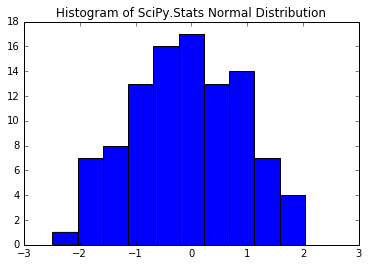

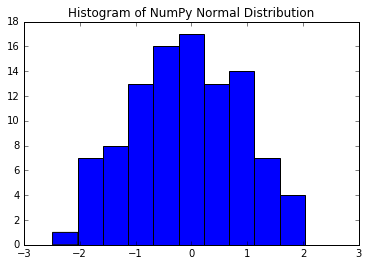

In [3]:
#Simulates a Gaussian RV 100 times in two different ways and creates a histogram

X = st.norm()
np.random.seed(100)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs or trials based on the standard Gaussian distribution
np.random.seed(100)
y = np.random.normal(size = 100) #Generates a vector with the results of 100 outputs based on the standard Gaussian distribution
plt.hist(x); #Creates a histogram of those results, the default value for the number of bins is bins=10
plt.title('Histogram of SciPy.Stats Normal Distribution')
plt.figure()
plt.hist(y);
plt.title('Histogram of NumPy Normal Distribution')

The scipy and numpy methods for getting these variates should produce the same results, but the two histograms are different. This is due to the random number generator. If we seed the random number generator before running the methods, they should produce consistent results. In the code there are two commented lines with np.random.seed(100). Uncomment these, and run the code again. You should see the histograms are the same now. Essentially, seeding the random number generator, tells it where to start in it's sequence.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 1:</SPAN>** Using the custom discrete variable you made for a roll of the die in Lab 1, or some other method (include a text cell or a comment in the code to explain your method): (a) Simulate 100 rolls using the .rvs() method in the stats module. Plot a histogram of the results. Is it what you would expect? (b) Now simulate 10,000 rolls of the die and again plot a histogram. Observe any difference and explain your observation. 

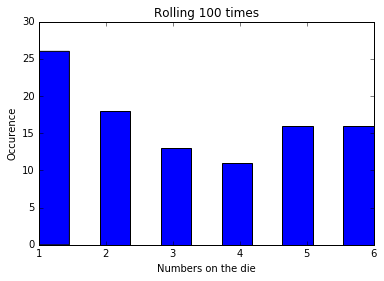

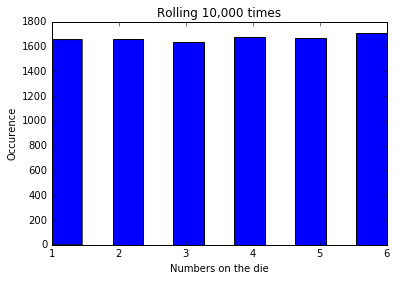

In [49]:
p = (1./6,1./6,1./6,1./6,1./6,1./6) #probabilities of each die face (as a tuple)
c = (1,2,3,4,5,6) #Die faces (as a tuple)
X = st.rv_discrete(values=(c,p)) #Creates an instance (aka object)
x = X.rvs(size = 100) #Generates a vector with the results of 100 outputs (Roll die 100 times)
plt.title('Rolling 100 times') #Title the first Histgram
plt.xlabel('Numbers on the die') #Label x-axis of the first Histgram
plt.ylabel('Occurence') #Label y-axis of the first Histgram
plt.hist(x, 11); #Plot the first Histgram with 11 intervals
plt.figure() #Plot another Histgram
y = X.rvs(size = 10000) #Generates a vertor with the results of 10,000 outputs (Roll die 10,000 times)
plt.title('Rolling 10,000 times') #Titles the second Histgram
plt.xlabel('Numbers on the die') #Labels x-axis of the second Histgram
plt.ylabel('Occurence') #Labels y-axis of the second Histgram
plt.hist(y, 11); #Plots the second Histgram with 11 intervals

Observation:
1. Each time we run the program, plots are different because each time we run the code, we create a new 100 or 10,000 trials.
2. For the 100 trials experiment, distribution among 6 faces of a die is not very likely. This means that error is big, because for each face on a die, the probability should be 1/6.
3. For the 10,000 trials experiemtn, distribution looks better. The difference in occurence looks smaller.
4. Therefore, with the number of trials goes up, the distribution become more and more ideal.

## The Law of Large Numbers:

The law of large numbers describes the result of performing the same experiment a large number of times. Let $X_1,X_2, \ldots ,X_n$ be a set of uncorrelated random variables, each with a finite mean of $\mu$. Let $S_n$ represent the sum of these random variables: $S_n=X_1+X_2+...+X_n$. The law of large numbers states that $P\left\{\Big|\frac{S_n}{n}-\mu\Big|\ge\delta\right\}\le\frac{C}{n\delta^2}\to0$ as $n\to\infty$. Put another way this simply states that the sum of the RVs divided by n converges in some sense to the mean ($\frac{S_n}{n}\to\mu$). A proof of this is given in the ECE 313 textbook, using a bounded variance assumption and the Chebychev inequality.

To observe this behavior by simulation, let's look at the Poisson distribution. A Poisson RV has a single parameter $\lambda$ which represents the mean number of occurances or counts, such as the mean number of hits your Youtube video gets in a day.  Then the probability that your video gets $i$ hits in one day is given by the pmf: $p(i)=\frac{\lambda^ie^{-\lambda}}{i!}$. So what if you totalled the number of hits you received each day for a week, month, or year and divided by that many days? The law of large numbers asserts that as $n$ gets large this should go to the mean $\lambda$. Below, we create a Poisson distribution where $\lambda=5$ hits per day. We retrieve a random variate each day and model the law of large numbers over time. Try running the cell multiple times and see how much variation there is for different runs.

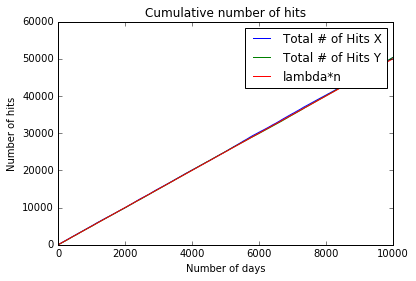

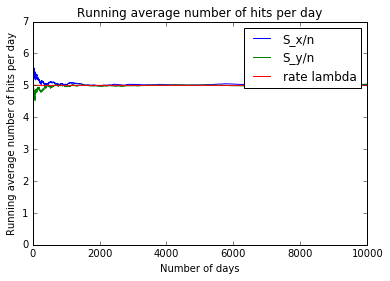

In [133]:
lamb = 5. #Our rate of hits per day
N = 10000 #Number of days we are going to simulate over
x = [st.poisson.rvs(lamb)]    #Gets the number of hits on the first day and stores it in a vector
y = [np.random.poisson(lamb)] #Same using numpy instead of scipy.stats
Sx = [0] #Sx will represent cumulative sums of the random variates at different times
Sy = [0] 
Ax = [0.0] #Ax will be an array of averages, Sx/n, at different times
Ay = [0.0]

for n in range(1,N+1): #Simulates over N days
    x.append(st.poisson.rvs(lamb)) #Appends the number of hits of the next day to the vector
    y.append(np.random.poisson(lamb))
    Sx.append(Sx[n-1]+x[n]) #Appends the sum at n to the vector
    Sy.append(Sy[n-1]+y[n])
    Ax.append(Sx[n]/(1.*n)) #Appends the sum over n to the vector
    Ay.append(Sy[n]/(1.*n))

n = np.linspace(0,N,N+1) #Generates an array of N+1 points from 0 to N for graphing purposes

plt.plot(Sx, label = 'Total # of Hits X') #Plots the total number of hits
plt.plot(Sy, label = 'Total # of Hits Y')
plt.plot(n, lamb*n, label = 'lambda*n') #Plots a line based on the rate given
plt.title('Cumulative number of hits')
plt.ylabel('Number of hits')
plt.xlabel('Number of days')
plt.legend()

plt.figure() #Creates a new figure
plt.plot(Ax, label = 'S_x/n') #Plots the average number of hits
plt.plot(Ay, label = 'S_y/n')
plt.plot(lamb*np.ones(N+1), label = 'rate lambda') #Plots the expected average
plt.title('Running average number of hits per day')
plt.ylabel('Running average number of hits per day')
plt.xlabel('Number of days')
plt.legend()

You can play with the above code. Change $\lambda$ or change the number of days we simulate over. You should see that $\frac{S_n}{n}\to\lambda$ as the number of days, $n$, increases. 
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 2:</SPAN>** Using your discrete die rolling RV, once again simulate 10000 rolls of the die. Show graphically that the law of large numbers is maintained for the average of the numbers of the first $n$ rolls as $n\rightarrow\infty.$ What would be a rough approximation of the sum? Of the average?  (Hint: There is no parameter $\lambda$ associated with the roll of a die.  But the mean value of a roll plays the same part.)

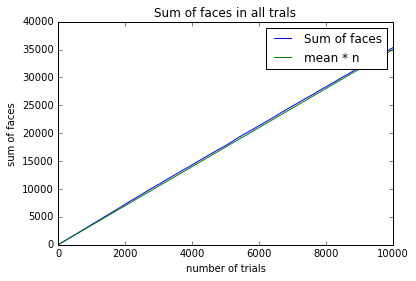

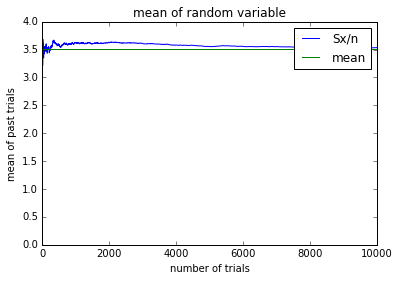

In [41]:
mean = 3.5
p = (1./6,1./6,1./6,1./6,1./6,1./6) #Probabilities of each die face (as a tuple)
c = (1,2,3,4,5,6) #Die faces (as a tuple)
RollDie = st.rv_discrete(values=(c,p)) #Creates an instance (aka object)
x = RollDie.rvs(size = 10001) #Gets random faces (aka rolling a die to get a face)
N = 10000 #Number of trials we are going to simulate
Sx = [0] #Represents sum of random variables (sum of die faces)
Ax = [0.0] #Ax is an array of averages, Sx/n, at different trials

for n in range(1, N+1): #Simulates over N trials
    Sx.append(Sx[n-1] + x[n]) #Appends the sum of faces at n to the vector
    Ax.append(Sx[n-1] / (1.*n)) #Appends the mean to the vector

n = np.linspace(0, N, N+1) #Generates an array of N+1 points from 0 to N for graphing

plt.plot(Sx, label = 'Sum of faces') #Plots the sum of faces
plt.plot(n, mean*n, label = 'mean * n') #Plots a line based on mean
plt.xlabel('number of trials') #Labels x-axis
plt.ylabel('sum of faces') #labels y-axis
plt.title('Sum of faces in all trals') #Titles the graph
plt.legend() #Makes a legend for the graph

plt.figure() #Creates another figure
plt.plot(Ax, label = 'Sx/n') #Plots the mean of past trials
plt.plot(mean * np.ones(N+1), label = 'mean') #Plots the expected average
plt.xlabel('number of trials') #Labels x-axis
plt.ylabel('mean of past trials') #Labels y-axis
plt.title('mean of random variable') #Titles the graph
plt.legend() #Makes a legend for the graph

Observation:
1. When n goes to infinity, the sum goes to infinity. However, the relationship between n and sum is sum = 3.5n
2. When n goes to infinity, mean goes to 3.5. This is because of the law of large numbers. As n goes to the infinity, Sx/n get closer to mean.

## Additional Lab Questions:

**For the completeion of this lab, make sure to do questions 1-2 as well as these two additional questions:**
<br><br>**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 3:</SPAN>** If you thought you could get out of your first probability lab without some questions on poker hands, I'm sorry, but they're too good to pass up. Suppose you draw five cards from a standard 52 card deck.
<ol><li>Caclulate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH.</li>
<li>Simulate 1,000,000 poker hands, count the number of times you get for each of the above hands and find the empirical probability of getting each of the above hands.  Your simulated hands
should include all possible poker hands.  (Hint: One way to represent a random poker hand is to use a 4 by 13 binary array with ones placed at five randomly chosen locations.   The np.sum command can be used to compute row or column sums.)</li>
<li>Do the probabilities match up relatively well?</li>
</ol>

In [41]:
#1. Caclulate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH.
def nCk(n, k): #Create a shortcut to compute n choose k.
    f = math.factorial #Factorial:n!
    return f(n) / f(k) / f(n-k) #Compute n choose k

Total = nCk(52,5) * 1. #Compute all the number of all outcomes and makes it double
PTwoPairs = nCk(13,2) * nCk(4,2) * nCk(4,2) * nCk(11,1) * nCk(4,1) / Total #Compute the possibility of getting a Two Pair
PThreeOfAKind = nCk(13,2) * nCk(4,1) * nCk(4,1) * nCk(11,1) * nCk(4,3) / Total #Compute the possibility of getting a Three of A Kind
PFullHouse = 13 * 12 * nCk(4,3) * nCk(4,2) / Total #Compute the possibility of getting a FullHouse
PFlush = nCk(13, 5) * 4 / Total #Compute the possibility of getting a Flush
print "#1. Caclulate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH."
print "P(TwoPairs) = ", PTwoPairs
print "P(PThreeOfAKind) = ", PThreeOfAKind
print "P(PFullHouse) = ", PFullHouse
print "P(PFlush) = ", PFlush

#1. Caclulate the probabilities of getting a TWO PAIR, THREE OF A KIND, FULLHOUSE, and a FLUSH.
P(TwoPairs) =  0.0475390156062
P(PThreeOfAKind) =  0.0211284513806
P(PFullHouse) =  0.00144057623049
P(PFlush) =  0.00198079231693


In [42]:
#2. Simulate 1,000,000 cards
#Create an tuple to represent each card including numbers and suits
f = (((0,0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12)),
     ((1,0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12)),
     ((2,0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12)),
     ((3,0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12)))

def checkTwoPair(n): #Define a function called checkTwoPair to check if the hand is a Two Pair
    n = list(n) #Convert tuple to list
    n.sort() #Sort the list
    if n.count(n[0])==2 and n.count(n[2])==2: #If the first and the third element in sorted list both have a twin, return true
        return True
    elif n.count(n[0])==2 and n.count(n[4])==2: #If the first and the fifth element in sorted list both have a twin, return true
        return True
    elif n.count(n[2])==2 and n.count(n[4])==2: #If the third and the fifth element in sorted list both have a twin, return true
        return True
    else: #Else the card is not a Two Pair hand, return false
        return False   
        
def checkThreeOfAKind(n): #Define a function called checkThreeOfAKind to check if the hand is a Three of A Kind
    n = list(n) #Convert tuple to list
    n.sort() #Sort the list
    if checkFullHouse(n)==True:
        return False
    elif n.count(n[0])==3 or n.count(n[2])==3 or n.count(n[4])==3: #Check Three of a Kind
        return True #Return true if the hand is a Three of A Kind
    else: #Else return false
        return False
        
def checkFullHouse(n): #Define a function called checkFullHouse to check if the hand is a Full House
    n = list(n) #Convert tuple to list
    n.sort() #Sort the list
    if n.count(n[0])==3 and n.count(n[4])==2: #If the first element has 2 other twins and the last element has another twin, it is a FullHouse
        return True
    elif n.count(n[0])==2 and n.count(n[4])==3: #If the first element has another 1 twin and the last element has 2 other twins, it is a FullHouse
        return True
    else: #Return false is it is not a FullHouse
        return False
        
def checkFlush(hand): #Define a function called checkFlush to check if the hand is a Flush
    #If five cards have the same suit, it is a Flush
    if hand[0][0] == hand[1][0] and hand[0][0] == hand[2][0] and hand[0][0] == hand[3][0] and hand[0][0] == hand[4][0]:
        return True #Return true if it is a Flush
    else:
        return False #Return false if it is not a Flush
    
trial = 1000000 #Number of trials to simulate
TwoPair = 0 #Initialize # of Two pair
ThreeOfAKind = 0 #Initialize # of Three of A Kind
FullHouse = 0 #Initialize # of FullHouse
Flush = 0 #Initialize # of Flush
for x in range(0, trial): #Loop 1,000,000 times
    hand = [] #Define hand as a tuple
    n = [] #Define all numbers in a hand
    k = 0 #Initialize k to 0 to enter the loop
    while (k < 5): #Initialize hand card
        s = np.random.randint(4) #Generate a radom suit 0-3
        num = np.random.randint(13) #Generate a radom number on card (0-12)
        if f[s][num] in hand: #Check if the card is in hand already
            pass #Do nothing if the card is already in hand
        else: #If the card is not in hand
            n.append(num) #Append the number of face to n
            hand.append(f[s][num]) #Append the card to hand
            k = k+1 #Increment k

    if checkTwoPair(n)==True: #check if the hand is a Two Pair
        TwoPair = TwoPair + 1 #Increment the number of Two Pair
    if checkThreeOfAKind(n): #check if the hand is a Three of A Kind
        ThreeOfAKind = ThreeOfAKind + 1 #Increment the number of Three of A Kind
    if checkFullHouse(n): #check if the hand is a Full House
        FullHouse = FullHouse + 1 #Increment the number of Full House
    if checkFlush(hand): #check if the hand is a Flush
        Flush = Flush + 1 #Increment the number of Flush

print "#2. Simulate 1,000,000 cards"
print "Number of Two Pair after 1,000,000 trials are: ", TwoPair
print "The Probability of Two Pair after 1,000,000 trials are: ", TwoPair/(trial*1.)
print "Number of Three of A Kind after 1,000,000 trials are: ", ThreeOfAKind
print "The Probability of Three of A Kind after 1,000,000 trials are: ", ThreeOfAKind/(trial*1.)
print "Number of FullHouse after 1,000,000 trials are: ", FullHouse
print "The probability of FullHouse after 1,000,000 trials are: ", FullHouse/(trial*1.)
print "Number of Flush after 1,000,000 trials are: ", Flush
print "The probability of Flush after 1,000,000 trials are: ", Flush/(trial*1.)

#2. Simulate 1,000,000 cards
Number of Two Pair after 1,000,000 trials are:  47434
The Probability of Two Pair after 1,000,000 trials are:  0.047434
Number of Three of A Kind after 1,000,000 trials are:  21033
The Probability of Three of A Kind after 1,000,000 trials are:  0.021033
Number of FullHouse after 1,000,000 trials are:  1435
The probability of FullHouse after 1,000,000 trials are:  0.001435
Number of Flush after 1,000,000 trials are:  1999
The probability of Flush after 1,000,000 trials are:  0.001999


#3. Although there are some errors, the results got from running 1,000,000 trials are pretty close to the ideal results calculated in #1.

**<SPAN style="BACKGROUND-COLOR: #C0C0C0">Problem 4:</SPAN>** A classic problem when being introduced to probability is the Monty Hall problem. If you've ever seen "Let's Make a Deal" on television, this problem takes from that show. You're the contestant. The host of the show gives you three doors to choose from. One door chosen at random holds a grand prize and the other two hold worthless items. You choose your door, and then the host reveals one of the doors you didn't choose such that it always holds a worthless item.  (If you initially choose the door with the grand prize, the host reveals either of the other doors with equal probability.) So now there are two doors left and the host asks you whether you would like to switch. What should you do?
<ol><li>Write down your first reaction? Would you switch doors or keep the one you have? Why?</li>
    <li>Create this scenario and simulate the strategy of sticking with the same door 1,000,000 times. What percentage of time did you win?</li>
    <li>Simulate the strategy of switching doors 1,000,000 times. What percentage of time did you win?</li>
    <li>Which strategy would you use now? Explain why this is the case.</li>
</ol>

#1. I will choose to switch the door, because it is more like to get the right door.

In [133]:
#2. Simulates sticking with the same door 1,000,000 times
p = (1./3,1./3,1./3) #probabilities of each door (as a tuple)
c = (1,2,3) #Door number (as a tuple)
X = st.rv_discrete(values=(c,p)) #Creates an instance (aka object)
x1 = X.rvs(size = 1000000) #Randomly place the price behind one door
x2 = X.rvs(size = 1000000) #Randomly choose a door
N = 1000000 #Number of trials
k = 0 #Number of wins

for n in range(0, N):
    if x1[n] == x2[n]: #If doors chose are the correct doors, players are going to win if sticking
        k = k + 1      #If doors chose are the wrong doors, players are going to loose if sticking

print "#2. Simulates sticking with the same door for 1,000,000 times"
print "Number win is: ", k
print "Percentage of winning is: ", k/(N*1.)

#2. Simulates sticking with the same door for 1,000,000 times
Number win is:  333143
Percentage of winning is:  0.333143


In [135]:
#3. Simulates not sticking with the same door 1,000,000 times
p = (1./3,1./3,1./3) #probabilities of each door (as a tuple)
c = (1,2,3) #Door number (as a tuple)
X = st.rv_discrete(values=(c,p)) #Creates an instance (aka object)
x1 = X.rvs(size = 1000000) #Randomly place the price behind one door
x2 = X.rvs(size = 1000000) #Randomly choose a door
N = 1000000 #Number of trials
k = 0 #Number of wins

for n in range(0, N):
    if x1[n] != x2[n]: #If doors chose are the correct door, players are going to loose after switching
        k = k + 1      #If doors chose are not the correct door, players are going to win after switching

print "#3. Simulates not sticking with the same door for 1,000,000 times"
print "Number win is: ", k
print "Percentage of winning is: ", k/(N*1.)

#3. Simulates not sticking with the same door for 1,000,000 times
Number win is:  667535
Percentage of winning is:  0.667535


#4. Now I will choose switching the door every time the host ask me, because according to the calculation my winning chance is doubled if I switch the door. When sticking with the door chose, probability of winning is 1/3. However, switching makes probibility of winning to 2/3.

**Cells Below is for drafting.**

In [43]:
print np.random.randint(4)+1
print np.random.randint(13)+1

ps = (1/4., 1/4., 1/4., 1/4.) #Possibilites of getting each suits
cs = (0, 1, 2, 3) #Each number represents each suits
S = st.rv_discrete(values=(cs,ps)) #Creates an instance (aka object)
s = S.rvs(size = 5)
print s

2
10
[1 1 0 0 2]


In [39]:
hand = [(1,2), (3,4), (5,6)]
print (10,11) in hand
print (1,2) in hand

False
True
